# A data exploring of the titanic effect

## 1. Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. This is a famous dataset based on this event. We will explore the data to find some interesting ideas.

## 2. Data

The data file is called "titanic_data.csv", which is provided by the *Udacity Supporting Materials*. We can read the file first and see what is the data structure.

In [1]:
import pandas as pd
titanic = pd.read_csv('titanic_data.csv')
print('data count: %d' % len(titanic))
titanic.head(10)

data count: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We’ve got a sense of our data. We know we’re working with 891 passengers of 12 variables. And we can see that there're missings in the data. Eachline of the data  represents a passenger and here’s the variables' meaning:

| Variable Name | Description                       |
|---------------|-----------------------------------|
| Survived      | Survival  (0 = No; 1 = Yes)       |
| Pclass        | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)              |
| Name          | Name                              |
| Sex           | Sex                               |
| Age           | Age                               |
| SibSp         | Number of siblings/spouses aboard |
| Parch         | Number of parents/children aboard |
| Ticket        | Ticket Number                     |
| Fare          | Passenger Fare                              |
| Cabin         | Cabin                             |
| Embarked      | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)             |



In [12]:
# Count how many NaN values there are in each column
print("Count how many NaN values there are in each column:")
len(titanic) - titanic.count()

Count how many NaN values there are in each column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family           0
dtype: int64

What also needs to be kept in mind is that there're some missing data in Age and Cabin.

## 3. Exploring

#### 3.1 Are passengers in first class more likely to survive?

An naturally occurring thoughts is that passenger class might affect the survival, as first class cabins were closer to the deck of the ship. So we extract the passengers' class data to survived people and rate among different classes.

In [3]:
spgagg = pd.crosstab(titanic.Pclass,titanic.Survived)
spgagg['survived_rate'] = spgagg[1]/(spgagg[0]+spgagg[1])
spgagg

Survived,0,1,survived_rate
Pclass,,,
1,80,136,0.629630
2,97,87,0.472826
3,372,119,0.242363


After grouped the data by class, it's clear that the passengers in first class have a higher survival rate. And the plot of the survived/unsurvived people of three classes tells the same story.

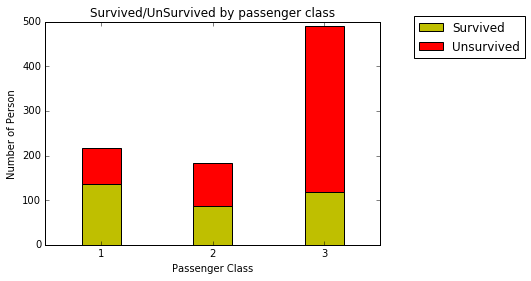

In [4]:
%matplotlib inline 
import pylab as plt
import numpy as np
width = 0.35  
Survived = (list(spgagg[1]))
Unsurvived = (list(spgagg[0]))
ind = np.arange(len(Survived))
p1 = plt.bar(ind, Survived, width, color='y',align='center')
p2 = plt.bar(ind, Unsurvived, width, bottom=Survived, color='r',align='center')

plt.ylabel('Number of Person')
plt.xlabel('Passenger Class')
plt.title('Survived/UnSurvived by passenger class')
plt.xticks(ind, spgagg.index)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Survived', 'Unsurvived'),bbox_to_anchor=(1.45, 1.05))
plt.show()

###### Chi-square test

A hypothesis test is used to help us conform the judgement. Our assumption is *the first class passengers has better chances of survival proportion than passengers in other classes*. A chi-square test is performed. The null hypothesis is that there is no significant difference in the chances of survival between the first and other classes passengers. And the alternative hypothesis is that there is a significant difference in the chances of survival between the first and other classes passengers.

$H_{0}: p_{f} = p_{o}$

$H_{A}: p_{f} \neq p_{o}$

$\alpha = 0.05$

where $p_{f}$ is the survival rate of first class passengers and $p_{o}$ is the survival rate of other classes passengers

In [5]:
import scipy.stats
spgagg.loc['others'] = spgagg.loc[2] + spgagg.loc[3]
ptab = spgagg[[0,1]].loc[[1,'others']]
def chi2test(data):
    print('Frequency Table:')
    print(ptab)
    print('\nChiSquare test:')
    chi2,pval,dof,expected = scipy.stats.chi2_contingency(ptab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return chi2,pval,dof,expected
chi2,pval,dof,expected = chi2test(ptab)

Frequency Table:
Survived      0      1
Pclass                
1          80.0  136.0
others    469.0  206.0

ChiSquare test:
ChiSquare test statistic:  71.4658385462
p-value:  2.82100211671e-17


Using the *chi2_contingency* function in scipy, we got a very high chi-square statistic, and an extremely low p value. Thus we reject the null hypothesis. The chi-square test provided convincing evidence that whether the passengers in the first class will significantly change their chances of survival. Maybe economic status and whether the passengers are survived are related. Given what we saw on the table and plot, we can infer that rich people have a better chance of survival, which is what we saw in the moive.

#### 3.2 Do women and children have a higher survival rate?

As we always hear --"Women and children first". So it's curious to see if it's true. 

First we need to clean the Age column and then the age distribution of survived and unsurvived people.

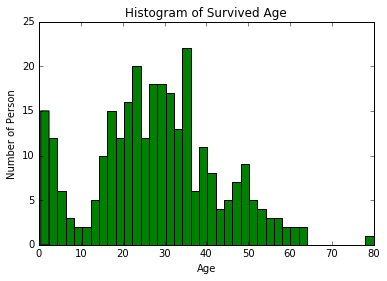

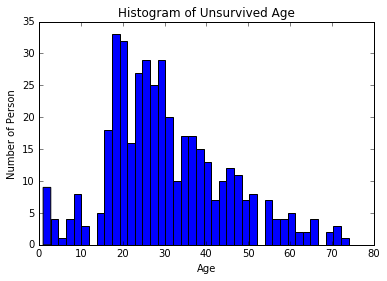

In [6]:
import copy
titanicAgeclean = copy.deepcopy(titanic.dropna(subset=['Age']))
Survivedage = titanicAgeclean[titanicAgeclean['Survived']==1]['Age']
Unsurvivedage = titanicAgeclean[titanicAgeclean['Survived']==0]['Age']

n, bins, patches = plt.hist(Survivedage, 40, facecolor='green')
plt.xlabel("Age")
plt.ylabel("Number of Person")
plt.title("Histogram of Survived Age");
plt.show()

n, bins, patches = plt.hist(Unsurvivedage, 40)
plt.xlabel("Age")
plt.ylabel("Number of Person")
plt.title("Histogram of Unsurvived Age");
plt.show()

Although we can see there is a high peak at age 0-8 in the distribution of survived people, it's not quite clear.

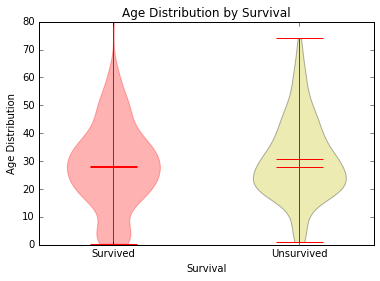

In [7]:
# import seaborn as sns; sns.set_style('darkgrid')
# p = sns.violinplot(data = titanicAgeclean, x = 'Survived', y = 'Age')
# p.set(title = 'Age Distribution by Survival', 
#         xlabel = 'Survival', 
#         ylabel = 'Age Distribution', 
#         xticklabels = ['Died', 'Survived']);
violin_parts = plt.violinplot([Survivedage,Unsurvivedage],[0,1],widths=0.5, showmeans=True,showextrema=True, showmedians=True,)
violin_parts['bodies'][0].set_color('r')
plt.xlabel("Survival")
plt.ylabel("Age Distribution")
plt.xticks([0,1],['Survived', 'Unsurvived'])
plt.title("Age Distribution by Survival");
plt.show()

The advantage of violin plot is that it place the distributions of survived and unsurvived group side by side. Overall the plot shows that the survived distribution has more children then the unsurvived.

For gender, we can draw similar plot as what we did for passenger class.

Survived    0    1  survival_rate
Sex                              
female     64  197       0.754789
male      360   93       0.205298




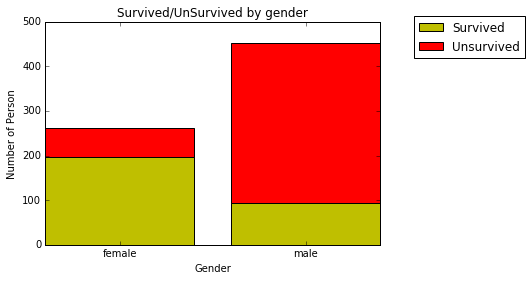

In [8]:
Ageagg = pd.crosstab(titanicAgeclean.Sex,titanicAgeclean.Survived)
Ageagg['survival_rate'] = Ageagg[1]/(Ageagg[1]+Ageagg[0])
print(Ageagg)
print('\n')
Survived = (list(Ageagg[1]))
Unsurvived = (list(Ageagg[0]))
ind = np.arange(len(Survived))
p1 = plt.bar(ind, Survived, color='y',align='center')
p2 = plt.bar(ind, Unsurvived, bottom=Survived, color='r',align='center')

plt.ylabel('Number of Person')
plt.xlabel('Gender')
plt.title('Survived/UnSurvived by gender')
plt.xticks(ind, Ageagg.index)
plt.legend((p1[0], p2[0]), ('Survived', 'Unsurvived'),bbox_to_anchor=(1.45, 1.05))
plt.show()

The data and plot seem to tell us that female passengers have a much higher survival rate. 

###### Chi-square test

All the above visualizations seems to meet our expectations. Now we need to do a hypothesis test to conform our findings. As before, a chi-square test is performed. Our assumption is *women and children have better chances of survival than other passengers*. So the null hypothesis is that the survival rate of women and children is not significantly different than other passengers, and the alternative hypothesis is that the survival rate of women and children is significantly different than other passengers. And the survival rate of women and children is not significantly different than other passengers.

First, we have to define "children". Then we created a new varible called "womenchildren". For women and children, it's 1, and for others it's 0. And again the *chi2_contingency* function in scipy will be employed.

$H_{0}: p_{1} = p_{2}$

$H_{A}: p_{1} \neq p_{2}$

$\alpha = 0.05$

where $p_{1}$ is the survival rate of women and children and $p_{2}$ is the survival rate of other passengers.

In [9]:
titanicAgeclean['womenchildren'] = np.where((titanicAgeclean.Age <= 17) | (titanicAgeclean.Sex == 'female'),1,0)
wcagg = pd.crosstab(titanicAgeclean.womenchildren,titanicAgeclean.Survived)
chi2,pval,dof,expected = chi2test(wcagg)

Frequency Table:
Survived      0      1
Pclass                
1          80.0  136.0
others    469.0  206.0

ChiSquare test:
ChiSquare test statistic:  71.4658385462
p-value:  2.82100211671e-17


As expected, the chi-square statistic is very high number, and the p-value is practically zero. Thus we reject the null hypothesis. The result suggest that whether a passenger is woman or children will affect his/her survival chance significantly.

#### 3.3 Will family size affetc survival rate?

Another varible seems interesting is the family size. When travelling as a group (not necessarily family), people can take care of each other. This may be a fator related to survival rate.

In this data, we cannot get people's relationship as friends or lovers. But we can get their family size by adding SibSp and Parch. So we will take a look at this new varible.

In [10]:
titanic['family'] = titanic['SibSp'] + titanic['Parch']
famagg = pd.crosstab(titanic.family,titanicAgeclean.Survived)
famagg['survival_rate'] = famagg[1]/(famagg[1]+famagg[0])
famagg

Survived,0.0,1.0,survival_rate
family,,,
0,274,130,0.321782
1,63,76,0.546763
2,40,53,0.569892
3,6,21,0.777778
4,8,3,0.272727
5,19,3,0.136364
6,8,4,0.333333
7,6,0,0.000000


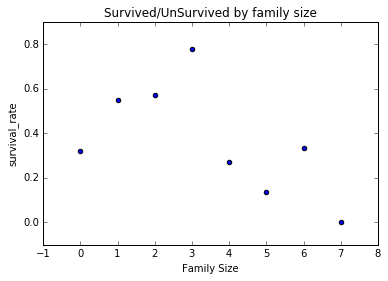

Pearson Correlation: -0.594703
p-value: 0.119949


In [11]:
plt.scatter(famagg.index,famagg['survival_rate'])
plt.ylabel('survival_rate')
plt.xlabel('Family Size')
plt.title('Survived/UnSurvived by family size')
plt.show()
coff, p = scipy.stats.stats.pearsonr(famagg.index, famagg['survival_rate'])
print('Pearson Correlation: %f' % coff)
print('p-value: %f' % p)

The family size and survival rate is not correlated. And the plot shows a high survival rate at family size is 3. So travelling alone or travelling with too many relatives may all have a low survival rate. It's reasonable, but we cannot get a promising findings based on this observation.

## 4. Conclusion

Since this is a very famous dataset and kaggle alse have a competition on this, there is definitely a lot more worth exploring. And based on these findings, we can build more accurate prediction models and dig out some stories that history won't tell. 